# Data exploration in 2016 US precidential elections

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

from collections import defaultdict

%matplotlib inline

matplotlib.style.use('ggplot')

pd.set_option("display.max_columns", None)
import seaborn as sns

# Task 1
Identify the top 5 Political Action Committees (PACs), or rather, super-PACs, that supported each of the two presidential candidates.

* Firstly, We will read the the csv file with the headers of the contributions from https://www.fec.gov/files/bulk-downloads/data_dictionaries/pas2_header_file.csv .
* We will also read the file of the contributions to candidates in which the headers will be included. source:https://www.fec.gov/files/bulk-downloads/2016/pas216.zip .
* This file contains each contribution or independent expenditure made by a PAC to a candidate during the period 2015-2016.There is information about the committee ID, the transaction ammount and the candidate ID.

In [2]:
headers_df=pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/pas2_header_file.csv')
headers_df
headers = headers_df.columns.tolist()
data_types = { header: np.str for header in headers }
data_types['TRANSACTION_AMT'] = np.float

contributions = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/pas216.zip', sep="|", index_col=False,names=headers,dtype=data_types)
contributions.head()


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00548198,N,M3,G2016,15950887602,24K,CCM,BLAINE FOR CONGRESS,JEFFERSON CITY,MO,65102,NaN,NaN,02102015,2500.0,C00458679,H8MO09153,6783511,998835,NaN,NaN,4032020151240895091
1,C00235739,N,M3,P2014,15950887798,24K,CCM,DAN NEWHOUSE FOR CONGRESS,YAKIMA,WA,98909,NaN,NaN,02052015,2500.0,C00559393,H4WA04104,B544444,998836,NaN,NaN,4032020151240895118
2,C00235739,N,M3,P2016,15950887799,24K,CCM,CATHY MCMORRIS RODGERS FOR CONGRESS,SPOKANE,WA,99210,NaN,NaN,02182015,1000.0,C00390476,H4WA05077,B544838,998836,NaN,NaN,4032020151240895120
3,C00235739,N,M3,G2018,15950887799,24K,CCM,MANCHIN FOR WEST VIRGINIA,WASHINGTON,DC,20002,NaN,NaN,02052015,1000.0,C00486563,S0WV00090,B544441,998836,NaN,NaN,4032020151240895121
4,C00235739,N,M3,P2016,15950887790,24K,CCM,PETE AGUILAR FOR CONGRESS,WASHINGTON,DC,20003,NaN,NaN,02182015,1500.0,C00510461,H2CA31125,B544833,998836,NaN,NaN,4032020151240895094


* Furthemore we should read the headers of the committee master file from https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv
* Then, we wil read the committee master file including the headers from the following source:https://www.fec.gov/files/bulk-downloads/2016/cm16.zip

In [3]:
cm_headers_df=pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv')

committee_headers = cm_headers_df.columns.tolist()

committees = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/cm16.zip', sep="|", index_col=False,names=committee_headers)

committees.head()

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000059,HALLMARK CARDS PAC,ERIN BROWER,2501 MCGEE,MD#288,KANSAS CITY,MO,64108,U,Q,UNK,M,C,NaN,NaN
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612,U,Q,UNK,Q,T,NaN,NaN
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"VIDYA KORA, M.D.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,Q,M,NaN,NaN


* We will merge the contributions file with the committees master file based on the committee id in order to obtain the names of the committees which received the money.

In [4]:
contributions = pd.merge(contributions, 
                committees[['CMTE_ID','CMTE_NM']], 
                on='CMTE_ID',
                how='inner')
contributions.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM
0,C00548198,N,M3,G2016,15950887602,24K,CCM,BLAINE FOR CONGRESS,JEFFERSON CITY,MO,65102,NaN,NaN,02102015,2500.0,C00458679,H8MO09153,6783511,998835,NaN,NaN,4032020151240895091,ELECTRONIC TRANSACTIONS ASSOCIATION POLITICAL ...
1,C00548198,N,M3,G2016,15950887602,24K,CCM,KEVIN MCCARTHY FOR CONGRESS,BAKERSFIELD,CA,93389,NaN,NaN,02112015,1000.0,C00420935,H6CA22125,6788487,998835,NaN,NaN,4032020151240895092,ELECTRONIC TRANSACTIONS ASSOCIATION POLITICAL ...
2,C00548198,N,YE,P2016,201601279004656707,24K,CCM,STIVERS FOR CONGRESS,COLUMBUS,OH,43220,NaN,NaN,12072015,1500.0,C00441352,H8OH15076,7589116,1043251,NaN,CONTRIBUTION,4012820161261104190,ELECTRONIC TRANSACTIONS ASSOCIATION POLITICAL ...
3,C00548198,N,YE,G2016,201601279004656707,24K,CCM,POLIQUIN FOR CONGRESS,OAKLAND,ME,04963,NaN,NaN,12112015,1000.0,C00518654,H4ME02234,7602796,1043251,NaN,CONTRIBUTION,4012820161261104191,ELECTRONIC TRANSACTIONS ASSOCIATION POLITICAL ...
4,C00548198,N,M5,G2016,15951401810,24K,CCM,SANFORD BISHOP FOR CONGRESS,COLUMBUS,GA,31902,NaN,NaN,04272015,1000.0,C00266940,H2GA02031,6987409,1008296,NaN,GENERAL ELECTION,4052020151243855449,ELECTRONIC TRANSACTIONS ASSOCIATION POLITICAL ...


* The next steps is to read the headers of the candidate master file from https://www.fec.gov/files/bulk-downloads/data_dictionaries/cn_header_file.csv .
* We will also read the candidate master file from https://www.fec.gov/files/bulk-downloads/2016/cn16.zip  and we will include the headers.


In [5]:
cn_headers_df=pd.read_csv('C:/cn_header_file.csv')
candidate_headers = cn_headers_df.columns.tolist()
candidates = pd.read_csv('C:/cn.txt', sep="|", index_col=False,names=candidate_headers)
candidates.head()



,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00097,"COX, JOHN R.",REP,2014,AK,H,0.0,C,N,C00525261,P.O. BOX 1092,NaN,ANCHOR POINT,AK,99556.0
1,H0AL02087,"ROBY, MARTHA",REP,2016,AL,H,2.0,I,C,C00462143,PO BOX 195,NaN,MONTGOMERY,AL,36101.0
2,H0AL02095,"JOHN, ROBERT E JR",IND,2016,AL,H,2.0,C,N,NaN,1465 W OVERBROOK RD,NaN,MILLBROOK,AL,36054.0
3,H0AL05049,"CRAMER, ROBERT E ""BUD"" JR",DEM,2008,AL,H,5.0,NaN,P,C00239038,PO BOX 2621,NaN,HUNTSVILLE,AL,35804.0
4,H0AL05163,"BROOKS, MO",REP,2016,AL,H,5.0,I,C,C00464149,7610 FOXFIRE DRIVE,NaN,HUNTSVILLE,AL,35802.0


> Since we are interested in finding the PACs which support each candicate, we will select those candidates running for president in 2016.Also, we will choose the value 'P' from the column CAND_OFFICE which means that the candidate runs for president and the value 'C' for the column CAND_STATUS which means 'statutory candidate'.

In [6]:
candidates = candidates.loc[(candidates['CAND_ELECTION_YR'] == 2016) & (candidates['CAND_OFFICE'] == 'P') & (candidates['CAND_STATUS'] == 'C')]

* We will merge the contributions with the candidates dataframe based on the candidate id to obtain the names of the candidates and their party.

In [7]:
contributions = pd.merge(contributions, 
               candidates[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CAND_ID',
               how='inner')
contributions.head()



,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_NAME,CAND_PTY_AFFILIATION
0,C00271338,N,M7,P2016,201507209000292878,24K,CCM,HILLARY FOR AMERICA,NEW YORK,NY,101855256,NaN,NaN,06302015,2500.0,C00575795,P00003392,VNH369ZARP3,1016726,NaN,NaN,4072120151247607221,AMERIPAC: THE FUND FOR A GREATER AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
1,C00271338,N,M7,G2016,201607209021679615,24K,CCM,HILLARY FOR AMERICA,NEW YORK,NY,101855256,NaN,NaN,06162016,5000.0,C00575795,P00003392,VNH36A1E5R5,1089352,NaN,NaN,4080120161307462519,AMERIPAC: THE FUND FOR A GREATER AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
2,C00271338,N,M5,P2016,201605209015553266,24K,CCM,HILLARY FOR AMERICA,NEW YORK,NY,101855256,NaN,NaN,04132016,2500.0,C00575795,P00003392,VNH36A13924,1073224,NaN,NaN,4052020161292995578,AMERIPAC: THE FUND FOR A GREATER AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
3,C00242370,N,YE,P2016,201601169004510607,24K,CCM,HILLARY FOR AMERICA,NEW YORK,NY,101855256,NaN,NaN,11202015,5000.0,C00575795,P00003392,34DE094F407683D0B31,1040173,NaN,NaN,4011920161260682700,"MWH AMERICAS, INC. PAC","CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
4,C00507962,N,M11,P2016,201511049003282178,24K,CCM,HILLARY FOR AMERICA,NEW YORK,NY,10185,NaN,NaN,10292015,2700.0,C00575795,P00003392,SB23.5733,1031753,NaN,NaN,4110420151256840252,AES CORPORATION POLITICAL ACTION COMMITTEE; THE,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM


* We will change and keep only the names of the two presidential candidates since both have the name of the vice president.
* Also, we will filter the dataframe in order to include candidates from the two parties and the names of the two presidential candidates.

In [8]:
contributions.loc[contributions['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'CAND_NAME'] = 'TRUMP, DONALD J.'

contributions.loc[contributions['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'CAND_NAME'] = 'CLINTON, HILLARY RODHAM'  

contributions = contributions[contributions['CAND_PTY_AFFILIATION'].isin(['DEM', 'REP'])]

contributions= contributions.loc[contributions['CAND_NAME'].isin(['TRUMP, DONALD J.', 'CLINTON, HILLARY RODHAM'])].copy()

> Since we are interested in PACs which have supported the two candidates from the following documentation : https://www.fec.gov/campaign-finance-data/transaction-type-code-descriptions/, we can observe that the rows with trascaction type of '24E' are those contributions which have supported a candidate.Examining other transaction types , we can see that some contributions may be against a candidate. However, we will not take them into consideration since ,we are examining the PACs which supported a candidate. Also, we will keep only the contributions which are greater than zero.


In [9]:
contributions=contributions[contributions['TRANSACTION_TP']== '24E']
contributions = contributions[contributions['TRANSACTION_AMT'] > 0]

* The next step is to create a pivot table to identify if there are any PACs which supported both candidates

In [10]:
common_contributions = contributions.pivot_table(index='CMTE_NM', 
                                     columns='CAND_NAME',
                                     values='TRANSACTION_AMT',
                                     aggfunc='sum').dropna()
common_contributions

CAND_NAME,"CLINTON, HILLARY RODHAM","TRUMP, DONALD J."
CMTE_NM,,
AMERICA'S RENEWABLE FUTURE INC,12425.0,8362.0
CITIZENS UNITED SUPER PAC LLC,112320.0,321798.0
CLUB FOR GROWTH PAC,83.0,1432.0
FLORIDA NEW MAJORITY,185.0,2000.0
IMMIGRANT VOTERS WIN PAC,3464641.0,3850.0
NATIONAL RIFLE ASSOCIATION OF AMERICA POLITICAL VICTORY FUND,265.0,1867401.0
PLANNED PARENTHOOD VOTES,3542293.0,3456.0
REBUILDING AMERICA NOW,81000.0,4095640.0
SEIU COPE (SERVICE EMPLOYEES INTERNATIONAL UNION COMMITTEE ON POLITICAL EDUCATION),3126926.0,4580.0


* To ensure that a pac is related with one candidate, we choose to assign the PAC to the candidate with the biggest contribution.

In [11]:
contributions = contributions.sort_values(by='TRANSACTION_AMT', ascending=False)
contributions = contributions.drop_duplicates(subset='CMTE_ID', keep="first")

* We should also read the PAC Summary file from https://www.fec.gov/files/bulk-downloads/2016/webk16.zip

In [12]:
pac_headers=['CMTE_ID','CMTE_NM','CMTE_TP','CMTE_DSGN','CMTE_FILING_FREQ','TTL_RECEIPTS','TRANS_FROM_AFF',
              'INDV_CONTRIB','OTHER_POL_CMTE_CONTRIB','CAND_CONTRIB','CAND_LOANS','TTL_LOANS_RECEIVED','TTL_DISB',
             'TRANF_TO_AFF','INDV_REFUNDS','OTHER_POL_CMTE_REFUNDS','CAND_LOAN_REPAY','LOAN_REPAY','COH_BOP',
             'COH_COP','DEBTS_OWED_BY','NONFED_TRANS_RECEIVED','CONTRIB_TO_OTHER_CMTE','IND_EXP','PTY_COORD_EXP',
              'NONFED_SHARE_EXP','CVG_END_DT']

pac_data= pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/webk16.zip', sep="|", index_col=False,names=pac_headers)
pac_data.head()

,CMTE_ID,CMTE_NM,CMTE_TP,CMTE_DSGN,CMTE_FILING_FREQ,TTL_RECEIPTS,TRANS_FROM_AFF,INDV_CONTRIB,OTHER_POL_CMTE_CONTRIB,CAND_CONTRIB,CAND_LOANS,TTL_LOANS_RECEIVED,TTL_DISB,TRANF_TO_AFF,INDV_REFUNDS,OTHER_POL_CMTE_REFUNDS,CAND_LOAN_REPAY,LOAN_REPAY,COH_BOP,COH_COP,DEBTS_OWED_BY,NONFED_TRANS_RECEIVED,CONTRIB_TO_OTHER_CMTE,IND_EXP,PTY_COORD_EXP,NONFED_SHARE_EXP,CVG_END_DT
0,C00000059,HALLMARK CARDS PAC,Q,U,M,123198.92,0.0,123198.92,0.0,0.0,0.0,0.0,88500.00,0.0,0.00,0.0,0.0,0.0,104794.36,139493.28,0.0,0.0,88500.0,0.00,0.0,0.0,12/31/2016
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,Q,B,M,2114478.16,0.0,2099958.16,0.0,0.0,0.0,0.0,2047839.79,1790.0,12621.71,0.0,0.0,0.0,552464.38,619102.75,0.0,0.0,1853000.0,141616.35,0.0,0.0,12/31/2016
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,N,U,Q,41455.17,41453.0,0.00,0.0,0.0,0.0,0.0,39672.85,0.0,0.00,0.0,0.0,0.0,192.00,1974.00,0.0,0.0,0.0,0.00,0.0,0.0,12/31/2016
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,Q,U,Q,19065.00,0.0,19065.00,0.0,0.0,0.0,0.0,17592.50,2592.5,0.00,0.0,0.0,0.0,4681.26,6153.76,0.0,0.0,15000.0,0.00,0.0,0.0,12/31/2016
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,Q,U,Q,143170.00,0.0,142570.00,0.0,0.0,0.0,0.0,85918.48,13222.5,0.00,0.0,0.0,0.0,35530.91,92782.43,0.0,0.0,3000.0,0.00,0.0,0.0,12/31/2016


* We can merge the contributions with the pac dataset based on the committee id and  include the total receipts and disbursements of the PAC.

In [13]:
pac = pd.merge(contributions, 
               pac_data[['CMTE_ID', 'TTL_RECEIPTS','TTL_DISB']], 
               on='CMTE_ID',
               how='inner')
pac.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_NAME,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TTL_DISB
0,C90013301,N,YE,G2016,201701309041564775,24E,ORG,STARBOARD STRATEGIC,ALEXANDRIA,VA,22314,NaN,NaN,10052016,7209482.0,P80001571,P80001571,F57.6337,1143653,NaN,NaN,4021020171370386975,NATIONAL RIFLE ASSOCIATION INSTITUTE FOR LEGIS...,"TRUMP, DONALD J.",REP,0.00,33341464.65
1,C00608489,A,30G,G2016,201707199066816467,24E,ORG,TANGIBLE MEDIA INC,NEW YORK,NY,10018,NaN,NaN,11022016,3000000.0,P80001571,P80001571,SE24.93922,1173439,NaN,NaN,4072020171426282237,GREAT AMERICA PAC,"TRUMP, DONALD J.",REP,28684572.68,26625503.11
2,C00625574,N,30G,G2016,201612089037737565,24E,ORG,"METRO NEWSPAPER ADVERTISING SERVICES, INC.",UNIONDALE,NY,11555,NaN,NaN,11012016,2400428.0,P80001571,P80001571,SE.4346,1131079,NaN,NaN,4010420171358321581,SAVE AMERICA FROM ITS GOVERNMENT,"TRUMP, DONALD J.",REP,3623796.96,3622773.46
3,C00486845,A,12G,G2016,201702149049695350,24E,ORG,"TERRA STRATEGIES, LLC",DES MOINES,IA,503091801,NaN,NaN,10032016,2040211.0,P00003392,P00003392,E5B9CA233479B413DA50,1148958,NaN,NaN,4021720171370992025,LCV VICTORY FUND,"CLINTON, HILLARY RODHAM",DEM,19649152.67,20106056.06
4,C00618876,A,Q3,G2016,202003059203760464,24E,ORG,MULTI MEDIA SERVICES CORPORATION,ALEXANDRIA,VA,22314,NaN,NaN,07222016,1666666.0,P80001571,P80001571,SE24.165,1388173,NaN,NATIONAL CABLE AND BROADCAST ADVERTISING,4031220201703012218,REBUILDING AMERICA NOW,"TRUMP, DONALD J.",REP,23616516.94,22774745.33


* We compute the top 5 PACs for Hillary Clinton campaign  based on the amount raised and spent.

In [14]:
pac[pac['CAND_NAME'] == 'CLINTON, HILLARY RODHAM'].groupby('CMTE_NM')[['TTL_RECEIPTS','TTL_DISB']]\
                                                  .sum().sort_values(by='TTL_RECEIPTS',ascending=False)[:5]

,TTL_RECEIPTS,TTL_DISB
CMTE_NM,,
PRIORITIES USA ACTION,1.920658e+08,1.907102e+08
NEXTGEN CLIMATE ACTION COMMITTEE,9.301024e+07,9.603692e+07
SENATE MAJORITY PAC,9.282108e+07,9.120442e+07
SEIU COPE (SERVICE EMPLOYEES INTERNATIONAL UNION COMMITTEE ON POLITICAL EDUCATION),5.026468e+07,5.531021e+07
FOR OUR FUTURE,4.894757e+07,4.833690e+07


* We compute the top 5 PACs for Donal Trump campaign  based on the amount raised and spent.

In [15]:
pac[pac['CAND_NAME'] == 'TRUMP, DONALD J.'].groupby('CMTE_NM')[['TTL_RECEIPTS','TTL_DISB']]\
                                           .sum().sort_values(by='TTL_RECEIPTS',ascending=False)[:5]

,TTL_RECEIPTS,TTL_DISB
CMTE_NM,,
GREAT AMERICA PAC,28684572.68,26625503.11
FUTURE45,24996520.04,24970329.55
REBUILDING AMERICA NOW,23616516.94,22774745.33
NATIONAL RIFLE ASSOCIATION OF AMERICA POLITICAL VICTORY FUND,21591111.40,22612663.36
CLUB FOR GROWTH ACTION,19936801.97,20358848.19


# Task 2
Identify the top 10 individual donors (i.e., persons) for each of the two presidential candidates and the amount they spent.

* Firstly, we will read the header file of the individuals contributions from https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv and we will assign all columns as strings apart from the transaction amount.

In [16]:
headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv')
headers = headers_df.columns.tolist() 
data_types = { header: np.str for header in headers }
data_types['TRANSACTION_AMT'] = np.float


* Next we will read  the individuals contributions file from https://www.fec.gov/files/bulk-downloads/2016/indiv16.zip 

In [17]:
ind = pd.read_csv('itcont.txt', 
                  sep="|", 
                  index_col=False, 
                  names=headers,
                  dtype=data_types)

* We will merge the contributions from individuals with the pac dataset from question 1 based on the committee id and we are going to include the candidate id, name and the party.

In [18]:
ind_pac = pd.merge(ind, 
               pac[['CMTE_ID','CAND_ID','CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CMTE_ID',
               how='inner')
ind_pac.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00003590,N,M4,NaN,15951149312,15,IND,"COOK, DEBORAH H H.",GEORGETOWN,SC,294406843,USWA INTL,SENIOR LABOR CONTRACT NEGOTIATOR,03312015,40.0,NaN,A279C28D5A4194119AAA,1003337,NaN,NaN,4041620151241908492,P00003392,"CLINTON, HILLARY RODHAM",DEM
1,C00003590,N,M4,NaN,15951149312,15,IND,"WALTON, DEWITT",PITTSBURGH,PA,152194125,USWA INTL,SECTION HEAD,03312015,40.0,NaN,A21D4913AB6734F819EC,1003337,NaN,NaN,4041620151241908493,P00003392,"CLINTON, HILLARY RODHAM",DEM
2,C00003590,N,M4,NaN,15951149312,15,IND,"RAMIREZ, EMIL A",KANSAS CITY,MO,641512198,USWA INTL,DIRECTOR,03312015,36.0,NaN,A05D26790747F4DF3820,1003337,NaN,NaN,4041620151241908494,P00003392,"CLINTON, HILLARY RODHAM",DEM
3,C00003590,N,M4,NaN,15951149299,15,IND,"CLARK, ROBERT D",PITTSBURGH,PA,152171927,USWA INTL,ASSISTANT GENERAL COUNSEL,03152015,42.0,NaN,AC9FF72FD0C6E442893F,1003337,NaN,NaN,4041620151241908453,P00003392,"CLINTON, HILLARY RODHAM",DEM
4,C00003590,N,M4,NaN,15951149299,15,IND,"BREAN, RICHARD J",PITTSBURGH,PA,152082718,USWA INTL,GENERAL COUNSEL,03152015,58.0,NaN,A1EDB05B19BB94F6FB47,1003337,NaN,NaN,4041620151241908454,P00003392,"CLINTON, HILLARY RODHAM",DEM


* Also, we should filter the dataset with the individuals contributions of packs based  on the Entity type column in order to include only individuals.
* The result of this procedure will be a dataset with the contributions from individuals through the PACs.

In [19]:
ind_pac= ind_pac[ind_pac['ENTITY_TP'] == 'IND']

* Next, we will merge the individual contribution dataset wiht the committes based on the committee id and we will include to the new dataset the committee name and the candidate id.

In [20]:
ind = pd.merge(ind, 
               committees[['CMTE_ID', 'CMTE_NM', 'CAND_ID']], 
               on='CMTE_ID', 
               how='inner')

ind.head(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID
0,C00088591,N,M3,P,15970306895,15,IND,"BURCH, MARY K.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP PROGRAM MANAGEMENT,02132015,500.0,NaN,2A8EE0688413416FA735,998834,NaN,NaN,4032020151240885624,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,NaN
1,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,DIR PROGRAMS,02132015,200.0,NaN,20150211113220-479,998834,NaN,NaN,4032020151240885819,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,NaN
2,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,DIR PROGRAMS,02272015,200.0,NaN,20150225112333-476,998834,NaN,NaN,4032020151240885820,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,NaN
3,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP AND CFO,02132015,200.0,NaN,20150309_2943,998834,NaN,NaN,4032020151240885683,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,NaN
4,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP AND CFO,02272015,200.0,NaN,20150224153748-2525,998834,NaN,NaN,4032020151240885684,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,NaN


* We will merge the information from the individual contributions and committees with the candidates dataframe to include the candidate name and the candidate party.

In [21]:
ind = pd.merge(ind, 
               candidates[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CAND_ID',
               how='inner')
ind.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00496034,N,Q1,P2012,15970355498,15,IND,"RADCLIFFE, BRUCE",MORRIS,IL,604501031,ILLINOIS CENTRAL SCHOOL BUS,SCHOOL BUS DRIVER/TEACHER,02282015,25.0,NaN,SA17.933993,1003800,NaN,PRIMARY 2012 DEBT RETIREMENT,4041620151241918009,"RICK SANTORUM FOR PRESIDENT, INC. (2012)",P20002721,"SANTORUM, RICHARD J.",REP
1,C00496034,N,Q2,P2012,201507159000184269,15,IND,"GUNN, GEORGE",DALLAS,TX,752051646,HSI,GEOLOGIST,04222015,250.0,NaN,SA17.934004,1015452,NaN,PRIMARY 2012 DEBT RETIREMENT,4071620151247219909,"RICK SANTORUM FOR PRESIDENT, INC. (2012)",P20002721,"SANTORUM, RICHARD J.",REP
2,C00496034,N,Q2,P2012,201607149020459039,15,IND,"WYLIE, WAYNE",HURST,TX,760542030,JPMORGAN CHASE,CREDIT OFFICER,04052016,100.0,NaN,SA17A.934008,1084548,NaN,DEBT RETIREMENT,4071420161306637270,"RICK SANTORUM FOR PRESIDENT, INC. (2012)",P20002721,"SANTORUM, RICHARD J.",REP
3,C00578492,A,YE,P2016,201602199008506451,15,IND,"ARTZ, CHARLES I. MR.",HARRISBURG,PA,171128520,SELF EMPLOYED,ATTORNEY,12282015,250.0,NaN,ABFA3EBC3759E4C57B7C,1051195,NaN,NaN,4022320161272640679,SANTORUM FOR PRESIDENT 2016,P20002721,"SANTORUM, RICHARD J.",REP
4,C00578492,A,YE,P2016,201602199008506451,15,IND,"BOENDER, STEVEN MR.",OSKALOOSA,IA,525779057,SELF EMPLOYED,FARMER,12282015,500.0,NaN,ACC2B329C836A42BBBAB,1051195,NaN,NaN,4022320161272640680,SANTORUM FOR PRESIDENT 2016,P20002721,"SANTORUM, RICHARD J.",REP


> The next step is the filtering of the contributions from individuals dataframe in order to have transaction ammounts greater than zero. We will also keep only the names of the two presidential candidates and remove the name of the vice president.Moreover , we will filter the dataframe in order to include candidates from the two parties and the names of the two presidential candidates.

In [22]:
ind = ind[ind['TRANSACTION_AMT'] > 0]

ind.loc[ind['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'CAND_NAME'] = 'TRUMP, DONALD J.'

ind.loc[ind['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'CAND_NAME'] = 'CLINTON, HILLARY RODHAM'

ind = ind[ind['CAND_PTY_AFFILIATION'].isin(['DEM', 'REP'])]

* Checking the data we discovered that there are 3 different entries for Donald Trump : 'TRUMP, DONALD J', 'TRUMP, DONALD J.','TRUMP, DONALD J J.'
* We decided to rename the two of the different names to TRUMP, DONALD J.

In [23]:
occ_mapping = {
    'TRUMP, DONALD J': 'TRUMP, DONALD J.',
    'TRUMP, DONALD J J.': 'TRUMP, DONALD J.'
}


f = lambda x: occ_mapping.get(x, x) 
ind.loc[:, 'NAME'] = ind.loc[:, 'NAME'].map(f)

* We concatenate the individual contributions related dicreclty to candidates with the contributions related to candidates through the PACs.

In [24]:
donors=pd.concat([ind[['NAME','TRANSACTION_AMT','CAND_NAME']],ind_pac[['NAME','TRANSACTION_AMT','CAND_NAME']]])

* We compute the top 10 individual donors for Hillary Clinton.

In [25]:
donors[donors['CAND_NAME'] == 'CLINTON, HILLARY RODHAM'].groupby('NAME')['TRANSACTION_AMT']\
                                                        .sum().sort_values(ascending=False)[:10]

NAME
STEYER, THOMAS F.                  89500000.0
SUSSMAN, DONALD                    24050000.0
EYCHANER, FRED                     23105400.0
MOSKOVITZ, DUSTIN                  16403000.0
SOROS, GEORGE                      15909393.0
ASSOCIATION, NATIONAL EDUCATION    12175000.0
SIMONS, JAMES                      11000680.0
PRITZKER, JAY ROBERT                9300848.0
ABRAHAM, DANIEL                     9250175.0
SIMONS, JAMES H.                    8500000.0
Name: TRANSACTION_AMT, dtype: float64

* we delete from the donors the ASSOCIATION, NATIONAL EDUCATION since it is not a person despite the fact that it has entity type 'ind'.

In [26]:
donors = donors[donors['NAME'] != 'ASSOCIATION, NATIONAL EDUCATION']

* We compute the top 10 individual donors for Hillary Clinton again.

In [27]:
donors[donors['CAND_NAME'] == 'CLINTON, HILLARY RODHAM'].groupby('NAME')['TRANSACTION_AMT']\
                                                        .sum().sort_values(ascending=False)[:10]

NAME
STEYER, THOMAS F.         89500000.0
SUSSMAN, DONALD           24050000.0
EYCHANER, FRED            23105400.0
MOSKOVITZ, DUSTIN         16403000.0
SOROS, GEORGE             15909393.0
SIMONS, JAMES             11000680.0
PRITZKER, JAY ROBERT       9300848.0
ABRAHAM, DANIEL            9250175.0
SIMONS, JAMES H.           8500000.0
PRITZKER, MARY KATHRYN     7552700.0
Name: TRANSACTION_AMT, dtype: float64

* We compute the top 10 individual donors for Donald Trump.

In [28]:
donors[donors['CAND_NAME'] == 'TRUMP, DONALD J.'].groupby('NAME')['TRANSACTION_AMT'].sum().sort_values(ascending=False)[:10]

NAME
TRUMP, DONALD J.            18633157.0
ADELSON, MIRIAM             10000000.0
ADELSON, SHELDON            10000000.0
MCMAHON, LINDA E.            7000000.0
MARCUS, BERNARD              5000000.0
PERLMUTTER, ISAAC            5000000.0
UIHLEIN, RICHARD             4385800.0
PALMER, GEOFFREY H.          4000000.0
BEAL, DANIEL A.              3615764.0
STEPHENS, JACKSON T. JR.     3595100.0
Name: TRANSACTION_AMT, dtype: float64

# Task 3
Investigate the chronological evolution of the contributions made to and the expenditures made by the campaigns.

* Firstly, we will read the headers of the operating expenditure file from https://www.fec.gov/files/bulk-downloads/data_dictionaries/oppexp_header_file.csv and we will assign all columns as string apart from the transaction amount.

In [29]:
exp_headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/oppexp_header_file.csv')
headers = exp_headers_df.columns.tolist()
data_types = { header: np.str for header in headers }
data_types['TRANSACTION_AMT'] = np.float

* we will read the file of the operating expeditures by specifying the headers and the comlumns data types.

In [30]:
exp = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/oppexp16.zip', 
                  sep="|", 
                  index_col=False, 
                  names=headers,
                  dtype=data_types)
exp.head()

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID
0,C00415182,N,2015,Q1,15951142498,17,F3,SB,CHASE CARDMEMBER SERVICE,WILMINGTON,DE,198865153,02/21/2015,3301.24,P2016,CREDIT CARD PAYMENT,001,Administrative/Salary/Overhead Expenses,NaN,NaN,ORG,4041520151241882404,1002978,VN81E9TS8X8,NaN
1,C00415182,N,2015,Q1,15951142495,17,F3,SB,GOOGLE INC.,SAN FRANCISCO,CA,941390001,01/21/2015,56.42,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882396,1002978,VN81E9TQB00,VN81E9TQAP1
2,C00415182,N,2015,Q1,15951142495,17,F3,SB,LINKEDIN CORPORATION,MOUNTAIN VIEW,CA,94043,01/21/2015,49.95,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882397,1002978,VN81E9TQB76,VN81E9TQAP1
3,C00415182,N,2015,Q1,15951142496,17,F3,SB,NATIONBUILDER,LOS ANGELES,CA,900131155,01/21/2015,99.00,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882398,1002978,VN81E9TS9X1,VN81E9TQAP1
4,C00415182,N,2015,Q1,15951142496,17,F3,SB,"NGP VAN, INC.",WASHINGTON,DC,20005,01/21/2015,2000.00,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882399,1002978,VN81E9TQAX7,VN81E9TQAP1


* We will merge the expenditures and the committees which are related directly to a candidate based on the committee id.

In [31]:
exp=pd.merge(exp, 
               committees[['CMTE_ID','CAND_ID']], 
               on='CMTE_ID',
               how='inner')


* We will merge the information from the expenditures, the committees related to candidates and the candidate name and party. 

In [32]:
exp = pd.merge(exp, 
               candidates[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CAND_ID',
               how='inner')
exp.head()

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00577916,A,2015,Q3,201606079017477046,17,F3,SB,MIDWAY BROADCASTING CORP,CHICAGO,IL,606196397,08/19/2015,1650.00,P2016,MEDIA,NaN,NaN,NaN,NaN,ORG,4060720161294537159,1076489,B7C940C2F2B2C4EF8B2D,NaN,P60007515,"WILSON, WILLIE",DEM
1,C00577916,A,2015,Q3,201606079017477046,17,F3,SB,FAITH BASED COMMUNICATION INC,BROADVIEW,IL,601554002,08/19/2015,5000.00,P2016,MEDIA,NaN,NaN,NaN,NaN,ORG,4060720161294537161,1076489,B85D71AE269B4421DB19,NaN,P60007515,"WILSON, WILLIE",DEM
2,C00577916,A,2015,Q3,201606079017477047,17,F3,SB,"SPENCER, DENISE",CHICAGO,IL,606052146,08/19/2015,2500.00,P2016,MEDIA CONSULTING,NaN,NaN,NaN,NaN,IND,4060720161294537163,1076489,B6A2A569F49594C01B9E,NaN,P60007515,"WILSON, WILLIE",DEM
3,C00577916,A,2015,Q3,201606079017477047,17,F3,SB,"KIRK, ROGERS",BETTENDORF,IA,527223726,08/20/2015,2000.00,P2016,CAMPAIGN CONSULTING,NaN,NaN,NaN,NaN,IND,4060720161294537165,1076489,BDA07EBF79FCE413E91E,NaN,P60007515,"WILSON, WILLIE",DEM
4,C00577916,A,2015,Q3,201606079017477047,17,F3,SB,PAYPAL,SAN JOSE,CA,951312021,08/21/2015,1.75,P2016,FEES,NaN,NaN,NaN,NaN,ORG,4060720161294537167,1076489,B2D3D341D772A4791A76,NaN,P60007515,"WILSON, WILLIE",DEM


> The next step is to filter the expeditures related to candidates.We will  keep only the names of the two presidential candidates and remove the name of the vice president.Moreover , we will filter the dataframe in order to include candidates from the two parties and only the names of the two presidential candidates.

In [33]:
exp.loc[exp['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'CAND_NAME'] = 'TRUMP, DONALD J.'
exp.loc[exp['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'CAND_NAME'] = 'CLINTON, HILLARY RODHAM'
exp = exp[exp['CAND_PTY_AFFILIATION'].isin(['DEM', 'REP'])]
exp = exp[exp['CAND_NAME'].isin(['TRUMP, DONALD J.','CLINTON, HILLARY RODHAM'])]

* We will create a new dataframe from the exp dataset by keeping only specific columns.
* We wil concatenate the conributions related directly to candidates and the contributions through the PACs which support the candidates.

In [34]:
total_exp= exp[['NAME','TRANSACTION_AMT','CAND_NAME','STATE','TRANSACTION_DT']].copy()

total_cont=pd.concat([contributions[['NAME','TRANSACTION_AMT','CAND_NAME','STATE','TRANSACTION_DT']],
                         ind[['NAME','TRANSACTION_AMT','CAND_NAME','STATE','TRANSACTION_DT']]])

* We will change the type of the transaction date in both dataframes from string to datetime.
* We will filter the total contributions with the names of the two candidates.

In [35]:
total_cont['TRANSACTION_DT'] = pd.to_datetime(total_cont['TRANSACTION_DT'], format='%m%d%Y' )

total_exp['TRANSACTION_DT'] = pd.to_datetime(total_exp['TRANSACTION_DT'])

total_cont = total_cont[total_cont['CAND_NAME'].isin(['TRUMP, DONALD J.','CLINTON, HILLARY RODHAM'])]

* We create for both dataframes two new columns including on the first the month and year and the second one the quarter and year.

In [36]:
total_cont['month_year'] = total_cont['TRANSACTION_DT'].dt.to_period('M')

total_exp['month_year'] = total_exp['TRANSACTION_DT'].dt.to_period('M')

total_cont['quarter'] = pd.PeriodIndex(total_cont['TRANSACTION_DT'], freq='Q')

total_exp['quarter'] = pd.PeriodIndex(total_exp['TRANSACTION_DT'], freq='Q')

* We create a pivot table with the contributions on the quarters for 2015 and 2016

In [37]:
cont_quarter = total_cont.pivot_table(index='quarter', 
                                     columns='CAND_NAME',
                                     values='TRANSACTION_AMT',
                                     aggfunc='sum').dropna()
cont_quarter

CAND_NAME,"CLINTON, HILLARY RODHAM","TRUMP, DONALD J."
quarter,,
2015Q2,39618723.0,65224.0
2015Q3,22906972.0,1240883.0
2015Q4,25344391.0,725724.0
2016Q1,36146039.0,1550422.0
2016Q2,48612707.0,12533062.0
2016Q3,70818080.0,30641508.0
2016Q4,62458305.0,47134586.0


* Generally, we can see in the graph below that as the election period is getting closer the bigger the amounts of the contributions are.Especially, the contributions were more in 2016 than the 2015 in both campaings.

* We can also  observe in the graph that the contributions on Hillary Clinton's campaign are quite high the second quarter of 2015 and depite the fact that they have a significant drop the next quarter ,they are following an increasing tendency  and they are greater that trump's campaign contributions in all quarters.

* We should also mention that the biggest amount related to contributions for both candidates are in the last two quarters.

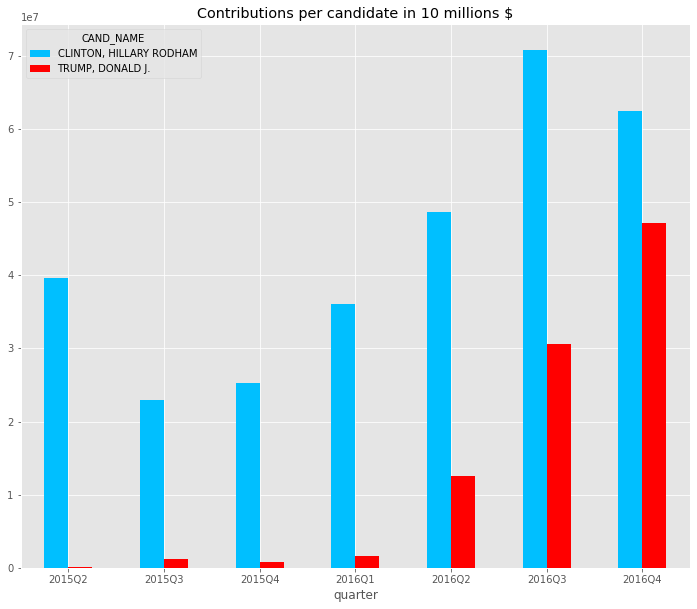

In [38]:
cont_quarter.plot(kind='bar', color=('deepskyblue', 'red'), figsize=(12, 10), rot=0,
                  title='Contributions per candidate in 10 millions $')

* We create a pivot table with the contributions per month for 2015 and 2016

In [39]:
cont_month = total_cont.pivot_table(index='month_year', 
                                     columns='CAND_NAME',
                                     values='TRANSACTION_AMT',
                                     aggfunc='sum').dropna()

* We can observe from the graph below that the monthly contributions on Hillary Clinton's campaign were the last 6 months of 2015 and the first 5 months of 2016 signifcantly greater than Trump's campaign .
* Also, we observe that the contributions of Trump's campaign began to increase the last 6 motnhs of the campaign period.
* Both campaigns collected the largest amount of contribution the month before the elections.
* Hillary Clinton's campaign succeeded to collect more money from contributions than Trump's campaign in all months expept the month after the elections.


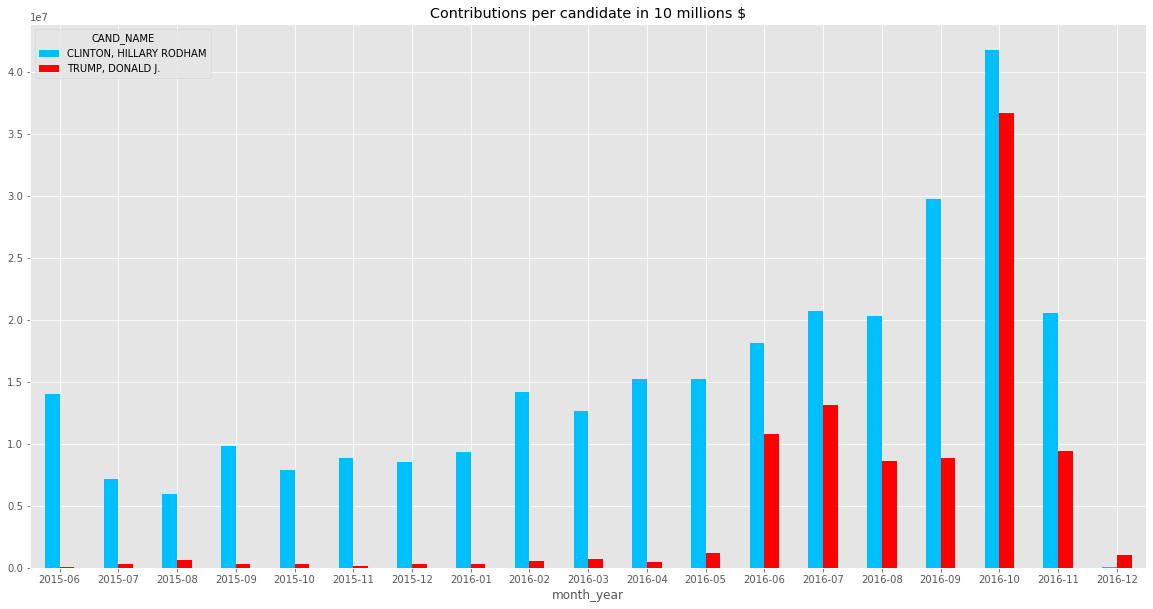

In [40]:
cont_month.plot(kind='bar', color=('deepskyblue', 'red'), figsize=(20, 10), rot=0,
                title='Contributions per candidate in 10 millions $')

* We create a pivot table with the expenditures of the both campaigns on the quarters of 2015 and 2016.

In [41]:
exp_quarter = total_exp.pivot_table(index='quarter', 
                                     columns='CAND_NAME',
                                     values='TRANSACTION_AMT',
                                     aggfunc='sum').dropna()
exp_quarter

CAND_NAME,"CLINTON, HILLARY RODHAM","TRUMP, DONALD J."
quarter,,
2015Q2,1.962892e+07,1.427252e+06
2015Q3,2.645162e+07,4.458100e+06
2015Q4,3.463332e+07,7.381479e+06
2016Q1,8.362189e+07,3.707287e+07
2016Q2,7.510131e+07,2.705738e+07
2016Q3,1.748064e+08,1.251959e+08
2016Q4,1.902813e+08,1.590646e+08


* Generally, we can see in the graph that as the election period is getting closer the expenditures in both campaings are increasing , except from the second quarter on 2016 where both candidates expeditures have been decreased which might be occured due to the large amount of money spent the next two quarters.

* We can also observe in the graph that the expenditures on Hillary Clinton's campaign are quite high in contrast with Donald Trump's campaign.

* We should also mention that the most amounts related to expeditures for both campaigns are in the last two quarters close to the election date.

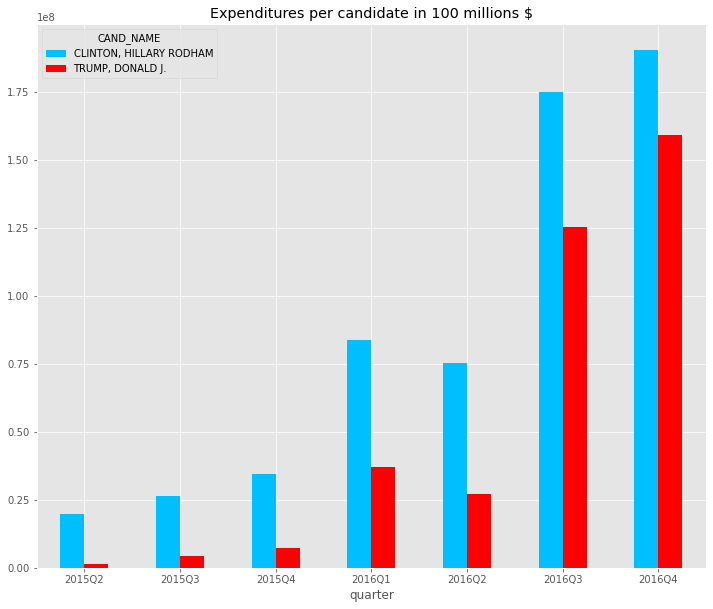

In [42]:
exp_quarter.plot(kind='bar', color=('deepskyblue', 'red'), figsize=(12, 10), rot=0,
                 title='Expenditures per candidate in 100 millions $')

* We create a pivot table with the expenditures of the both campaigns for the months of 2015 and 2016.

In [43]:
exp_month = total_exp.pivot_table(index='month_year', 
                                     columns='CAND_NAME',
                                     values='TRANSACTION_AMT',
                                     aggfunc='sum').dropna()

* We can observe from the graph below that both campaigns didn't spend so much  money in 2015 in contrast with the election year 2016 in which the amount of money had been increased.

* Also, both campaigns made their biggest expenditures the September and  October of 2016 since the elections took place in November.

* Hillary Clinton's campaign succeeded to spend more money  than Trump's campaign in all months expept the month after the elections.

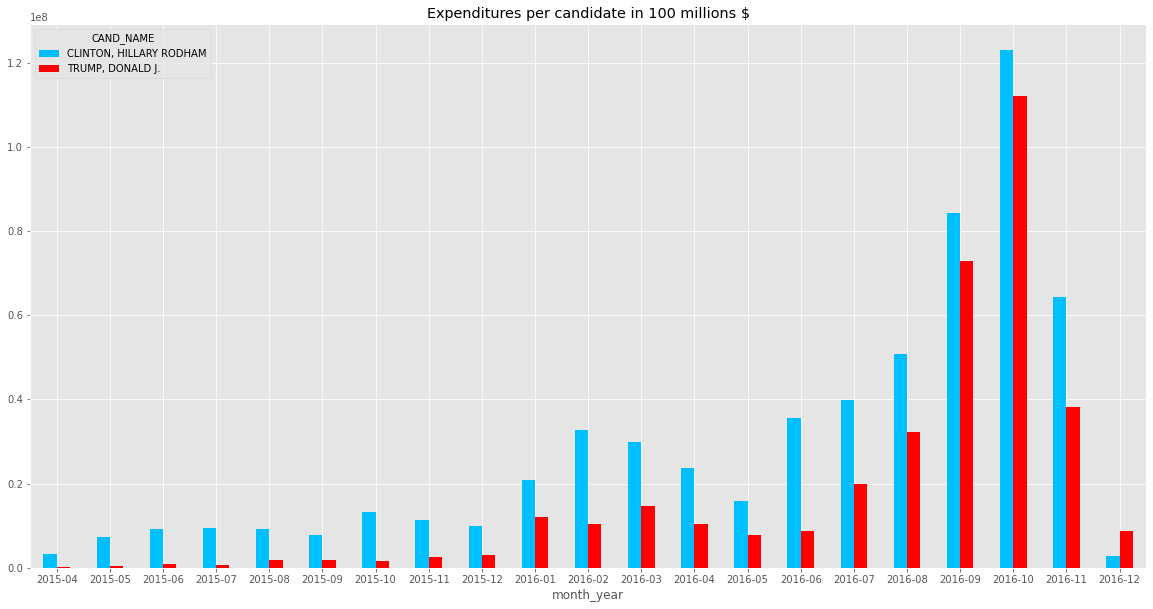

In [44]:

exp_month.plot(kind='bar', color=('deepskyblue', 'red'), figsize=(20, 10),rot=0,
               title='Expenditures per candidate in 100 millions $')

# Task 4
Identify the biggest recipients of campaign expenditures.

* We compute the top 10 organizations who receieved money from Hillary Clinton's campaign.

In [45]:
total_exp[total_exp['CAND_NAME'] == 'CLINTON, HILLARY RODHAM'].groupby('NAME')['TRANSACTION_AMT'].sum().sort_values(ascending=False)[:10]

NAME
GMMB                            3.084634e+08
BULLY PULPIT INTERACTIVE LLC    3.330646e+07
ADP                             2.790281e+07
AMERICAN EXPRESS                2.392283e+07
MARKHAM PRODUCTIONS             1.602585e+07
EXECUTIVE FLITEWAYS             1.586629e+07
AIR PARTNERS, INC.              1.115633e+07
STRIPE                          1.019984e+07
AETNA                           5.883909e+06
MISSION CONTROL, INC.           5.837600e+06
Name: TRANSACTION_AMT, dtype: float64

* We compute the top 10 organizations who receieved money from Donald Trump's campaign.

In [46]:
total_exp[total_exp['CAND_NAME'] == 'TRUMP, DONALD J.'].groupby('NAME')['TRANSACTION_AMT'].sum().sort_values(ascending=False)[:10]

NAME
GILES-PARSCALE                     87838378.10
AMERICAN MEDIA & ADVOCACY GROUP    74176379.30
RICK REED MEDIA, INC.              24359873.08
AMERICAN EXPRESS                   19393367.83
ACE SPECIALTIES, LLC               15885323.63
PRIVATE JET SERVICES, LLC           9953216.06
JAMESTOWN ASSOCIATES                8836175.01
TAG AIR, INC.                       8741464.25
AIR CHARTER TEAM                    8321403.26
CAMBRIDGE ANALYTICA, LLC            5912500.00
Name: TRANSACTION_AMT, dtype: float64

* We compute the top 10 organizations who receieved money from both presidential campaigns.

In [47]:
total_exp.groupby('NAME')['TRANSACTION_AMT'].sum().sort_values(ascending=False)[:10]

NAME
GMMB                               3.084634e+08
GILES-PARSCALE                     8.783838e+07
AMERICAN MEDIA & ADVOCACY GROUP    7.417638e+07
AMERICAN EXPRESS                   4.331620e+07
BULLY PULPIT INTERACTIVE LLC       3.330646e+07
ADP                                2.790281e+07
RICK REED MEDIA, INC.              2.435987e+07
MARKHAM PRODUCTIONS                1.602585e+07
ACE SPECIALTIES, LLC               1.588532e+07
EXECUTIVE FLITEWAYS                1.586629e+07
Name: TRANSACTION_AMT, dtype: float64

# Task 5 
Examine the geographical distribution, at the state level, of campaign expenditures.

* Firstly, we will read the xlsx document which contains the number of register voters per state from https://www2.census.gov/programs-surveys/cps/tables/p20/580/table04a.xlsx .

In [48]:
xls = pd.ExcelFile('https://www2.census.gov/programs-surveys/cps/tables/p20/580/table04a.xlsx')

voters = xls.parse('Table 4a', skiprows=4, index_col=None, na_values=['NA'])

* We will rename the column with the states and will keep only the rows which include the states and their information.

In [49]:
voters.rename(columns={ voters.columns[0]: "STATE" }, inplace = True)
voters = voters.iloc[1:52]

* We took the states with their abbreviations from this github repository  https://gist.github.com/rogerallen/1583593 .

In [50]:
us_state = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

* Since the column with the states names in our voters dataset is in uppercase , we will trasform the keys in the dictionary to uppercase.

In [51]:
us_state =  {k.upper(): v for k, v in us_state.items()}

f = lambda x: us_state.get(x, x) 
voters.loc[:,'STATE'] = voters.loc[:,'STATE'].map(f)

* We will create a new dataset  with the names of the candidates and the transcaction amounts for each state.
* We will merge this dataset with the voters based on the state to obtain the number of registered voters per state.

In [52]:
exp_state=total_exp.groupby(['CAND_NAME','STATE'])['TRANSACTION_AMT'].sum().unstack(0).fillna(0)

exp_state=pd.merge(exp_state, 
               voters[['STATE','Total registered']], 
               on='STATE',
               how='inner')
exp_state.head()

,STATE,"CLINTON, HILLARY RODHAM","TRUMP, DONALD J.",Total registered
0,AK,26231.93,20244.87,358.0
1,AL,2591329.75,480333.44,2526.0
2,AR,16349978.17,170702.77,1456.0
3,AZ,223656.15,3390083.23,3145.0
4,CA,16559604.86,9120311.40,16096.0


* We will display the state and the amount of expenditures for each candidate to have an idea about the distribution of the expenditures.

In [53]:
states=exp_state.iloc[:, :-1].set_index('STATE')
states[['CLINTON, HILLARY RODHAM','TRUMP, DONALD J.']]= states[['CLINTON, HILLARY RODHAM','TRUMP, DONALD J.']]
states

,"CLINTON, HILLARY RODHAM","TRUMP, DONALD J."
STATE,,
AK,2.623193e+04,2.024487e+04
AL,2.591330e+06,4.803334e+05
AR,1.634998e+07,1.707028e+05
AZ,2.236562e+05,3.390083e+06
CA,1.655960e+07,9.120311e+06
CO,5.053107e+06,2.821458e+06
CT,1.119594e+07,1.130803e+06
DC,3.528529e+08,7.095697e+06
DE,5.601902e+04,2.770871e+05


* We will multiply the number of voters with 1000 since the numbers in xlsx file were in thousands.
* We replace the total expenditure for each candidate with the expenditures per registered voter in each state. 

In [54]:
exp_state['Total registered']=exp_state['Total registered']*1000
exp_state['CLINTON, HILLARY RODHAM']=exp_state['CLINTON, HILLARY RODHAM']/exp_state['Total registered']
exp_state['TRUMP, DONALD J.']=exp_state['TRUMP, DONALD J.']/exp_state['Total registered']

* We compute the top 10 states where Hillary Clinton's campaign spend the most money per voter.

In [55]:
exp_state[['STATE','CLINTON, HILLARY RODHAM']].sort_values(by='CLINTON, HILLARY RODHAM', ascending=False)[:10]

,STATE,"CLINTON, HILLARY RODHAM"
7,DC,840.126024
31,NJ,13.007883
2,AR,11.229381
34,NY,8.757910
39,RI,6.503164
6,CT,6.350507
47,WA,2.155114
12,IA,1.917661
45,VA,1.756566
5,CO,1.746667


* We compute the top 10 states where Donald Trump's campaign spend the most money per voter.

In [56]:
exp_state[['STATE','TRUMP, DONALD J.']].sort_values(by='TRUMP, DONALD J.', ascending=False)[:10]

,STATE,"TRUMP, DONALD J."
45,VA,25.155077
7,DC,16.894517
30,NH,15.172850
43,TX,8.296781
18,LA,6.999831
31,NJ,4.622763
34,NY,3.005315
24,MO,2.857134
12,IA,1.577612
9,FL,1.560336


* We found from wikipedia the swing state from the 2016 elections https://en.wikipedia.org/wiki/Swing_state


In [57]:
swing_states=['ME','NV','MN','NH','MI','PA','WI','FL','AZ','NC','GA']

* We will filter the dataset with the expenditures per voter including only the swing states.


In [58]:

swing=exp_state[exp_state['STATE'].isin(swing_states)]

swing=swing.iloc[:, :-1].set_index('STATE')
swing

,"CLINTON, HILLARY RODHAM","TRUMP, DONALD J."
STATE,,
AZ,0.071115,1.077928
FL,1.298323,1.560336
GA,0.451970,0.573740
ME,0.109853,0.140638
MI,0.102869,0.160057
MN,0.223103,0.030036
NC,0.104712,0.276284
NH,1.021240,15.172850
NV,1.352611,0.825879


> We can observe for the plot below that in the majority of the swing states, Donald Trump has more expenditures per registered voter.Despite the fact that Hillary Clinton's campaign expenditures were  more than Trump's expenditures according to our previous analysis, we can observe that the approach of the Trump's campaign to spend more in these states ,might affect the result and lead to the victory of Donald Trump in the 2016 US elections.

* The swing states where Donad Trump's campaign had more expenditures are: Georgia, North Carolina, Florida, Arizona, Wisconsin, New Hampshire, Maine and Michigan

* The swing states where Hillary Clinton's campaign had more expenditures are : Nevada, Pennsylvania, Minnesota

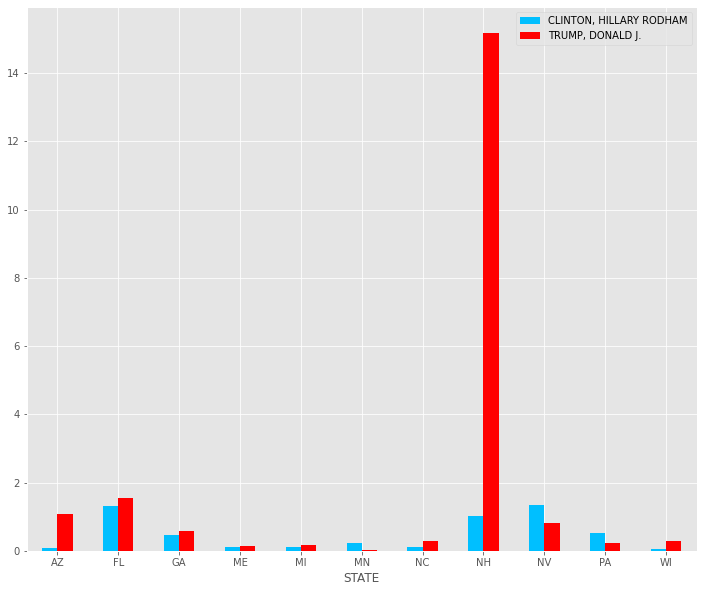

In [59]:
swing.plot(kind='bar', color=('deepskyblue', 'red'), figsize=(12, 10), rot=0)